In [2]:
%pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\jasra\AppData\Local\Temp\ipykernel_15896\2777763756.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label", palette="coolwarm")


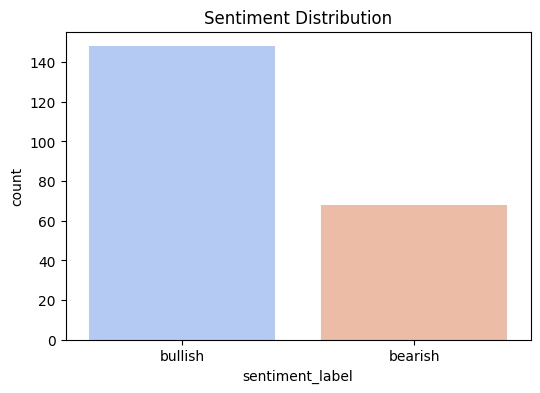

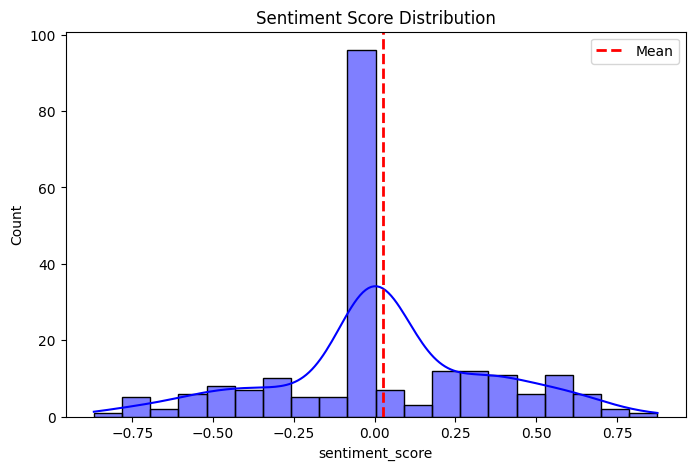

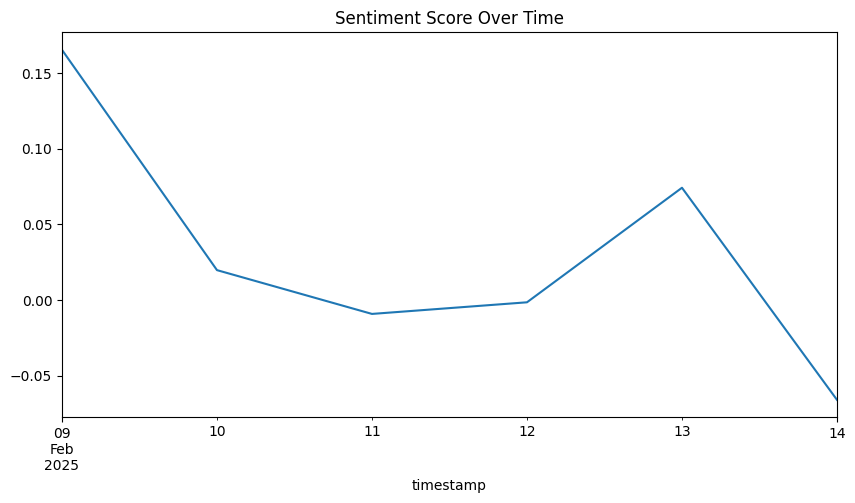

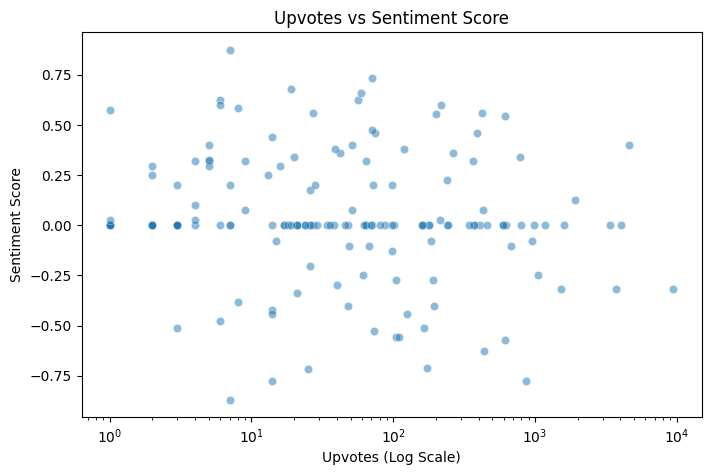

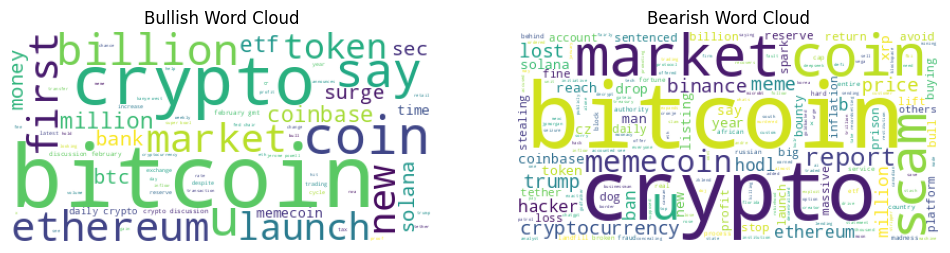

In [3]:
df = pd.read_csv("data/reddit_sentiment.csv")

# Display first few rows
df.head()

# Check missing values
df.isnull().sum()

# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm")
plt.title("Sentiment Distribution")
plt.show()

# Sentiment Score Histogram
plt.figure(figsize=(8,5))
sns.histplot(df["sentiment_score"], bins=20, kde=True, color="blue")
plt.axvline(df["sentiment_score"].mean(), color='red', linestyle='dashed', linewidth=2, label="Mean")
plt.legend()
plt.title("Sentiment Score Distribution")
plt.show()

# Time-Series Trend
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.resample("D")["sentiment_score"].mean().plot(figsize=(10,5), title="Sentiment Score Over Time")
plt.show()

# Relationship Between Upvotes & Sentiment Score
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["upvotes"], y=df["sentiment_score"], alpha=0.5)
plt.xscale("log")
plt.xlabel("Upvotes (Log Scale)")
plt.ylabel("Sentiment Score")
plt.title("Upvotes vs Sentiment Score")
plt.show()

# WordCloud for Bullish and Bearish Sentiment
bullish_text = " ".join(df[df["sentiment_label"] == "bullish"]["cleaned_text"])
bearish_text = " ".join(df[df["sentiment_label"] == "bearish"]["cleaned_text"])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(background_color="white").generate(bullish_text))
plt.axis("off")
plt.title("Bullish Word Cloud")

plt.subplot(1,2,2)
plt.imshow(WordCloud(background_color="white").generate(bearish_text))
plt.axis("off")
plt.title("Bearish Word Cloud")

plt.show()